In [103]:
import base64
import json
from PIL import Image
import cv2
import numpy as np

In [104]:
id_ = 789

In [105]:
def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGRA2RGBA)
    new_image = Image.fromarray(new_image)
    return new_image

In [106]:
with open(f"data/{id_}.json", encoding="utf-8") as f:
    data = json.load(f)
width = data["width"]
height = data["height"]
words = data["words"]
width, height

(1280, 720)

In [107]:
img = np.zeros((height, width, 3), dtype=np.uint8)

In [112]:
for w in words:
    word = w["word"]
    pos = w["pos"]
    word_size = w["word_size"]
    pngb64 = w["pngb64"]
    buf = np.asarray(bytearray(base64.b64decode(pngb64)), dtype=np.uint8)
    w["word_img"] = cv2.imdecode(buf, cv2.IMREAD_COLOR)

In [113]:
%%timeit
word_images = []
for w in words:
    word = w["word"]
    pos = w["pos"]
    word_size = w["word_size"]
    pngb64 = w["pngb64"]
    buf = np.asarray(bytearray(base64.b64decode(pngb64)), dtype=np.uint8)
    if pos[0] >= 0:
        x0 = pos[0]
        x2 = 0
    else:
        x0 = 0
        x2 = -pos[0]
    if pos[1] >= 0:
        y0 = pos[1]
        y2 = 0
    else:
        y0 = 0
        y2 = -pos[1]
    if pos[0] + word_img.shape[1] <= width:
        x1 = pos[0] + word_img.shape[1]
        x3 = word_img.shape[1]
    else:
        x1 = width
        x3 = width - pos[0]
    if pos[1] + word_img.shape[0] <= height:
        y1 = pos[1] + word_img.shape[0]
        y3 = word_img.shape[0]
    else:
        y1 = height
        y3 = height - pos[1]
    w = x1 - x0
    h = y1 - y0
#     print(word, pos, word_size, word_img.shape, x0, y0, x1, y1, x2, y2, x3, y3)
# 単純にコピーするとバウンディングボックスで前の文字が上書きされる
#     img[y0:y1, x0:x1, :] = word_img[y2:y3, x2:x3]
# 背景は黒、文字はそれより明るい（大きい）のでmaxを取ればよい
    img[y0:y1, x0:x1, :] = np.maximum(img[y0:y1, x0:x1, :], word_img[y2:y3, x2:x3])
    word_images.append(word_img)

9.64 ms ± 78.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


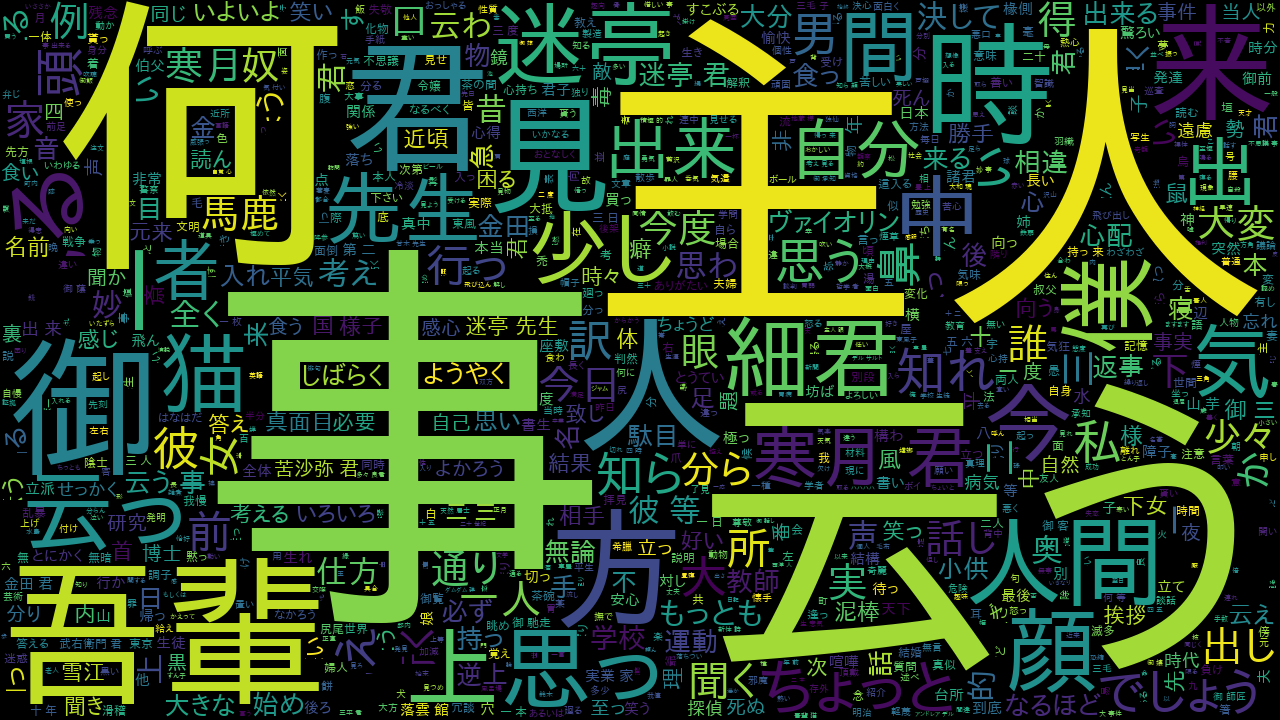

In [110]:
cv2pil(img)